In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 75 bytes


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:02<00:00, 30.8MB/s]
100% 2.29G/2.29G [01:02<00:00, 39.5MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/chest-xray-pneumonia.zip" -d '/content/uncompressed'

Streaming output truncated to the last 5000 lines.
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/uncompressed/chest_xray/train/NOR

In [ ]:
data_train = '/content/uncompressed/chest_xray/train'

In [ ]:
data_test = '/content/uncompressed/chest_xray/test'

In [ ]:
data_train

'/content/uncompressed/chest_xray/train'

In [ ]:
data_test

'/content/uncompressed/chest_xray/test'

In [ ]:
import pathlib
data_train = pathlib.Path(data_train)
data_train

PosixPath('/content/uncompressed/chest_xray/train')

In [ ]:
data_test = pathlib.Path(data_test)
data_test

PosixPath('/content/uncompressed/chest_xray/test')

In [ ]:
image_count = len(list(data_train.glob('NORMAL/*')))
print(image_count)

1341


In [ ]:
image_count = len(list(data_train.glob('PNEUMONIA/*')))
print(image_count)

3875


In [ ]:
image_count = len(list(data_test.glob('NORMAL/*')))
print(image_count)

234


In [ ]:
image_count = len(list(data_test.glob('PNEUMONIA/*')))
print(image_count)

390


In [ ]:
normal = list(data_train.glob('NORMAL/*'))
print(normal[:5])

[PosixPath('/content/uncompressed/chest_xray/train/NORMAL/NORMAL2-IM-1160-0001.jpeg'), PosixPath('/content/uncompressed/chest_xray/train/NORMAL/NORMAL2-IM-0600-0001.jpeg'), PosixPath('/content/uncompressed/chest_xray/train/NORMAL/NORMAL2-IM-1406-0001.jpeg'), PosixPath('/content/uncompressed/chest_xray/train/NORMAL/NORMAL2-IM-0696-0001.jpeg'), PosixPath('/content/uncompressed/chest_xray/train/NORMAL/NORMAL2-IM-0931-0001.jpeg')]


In [ ]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

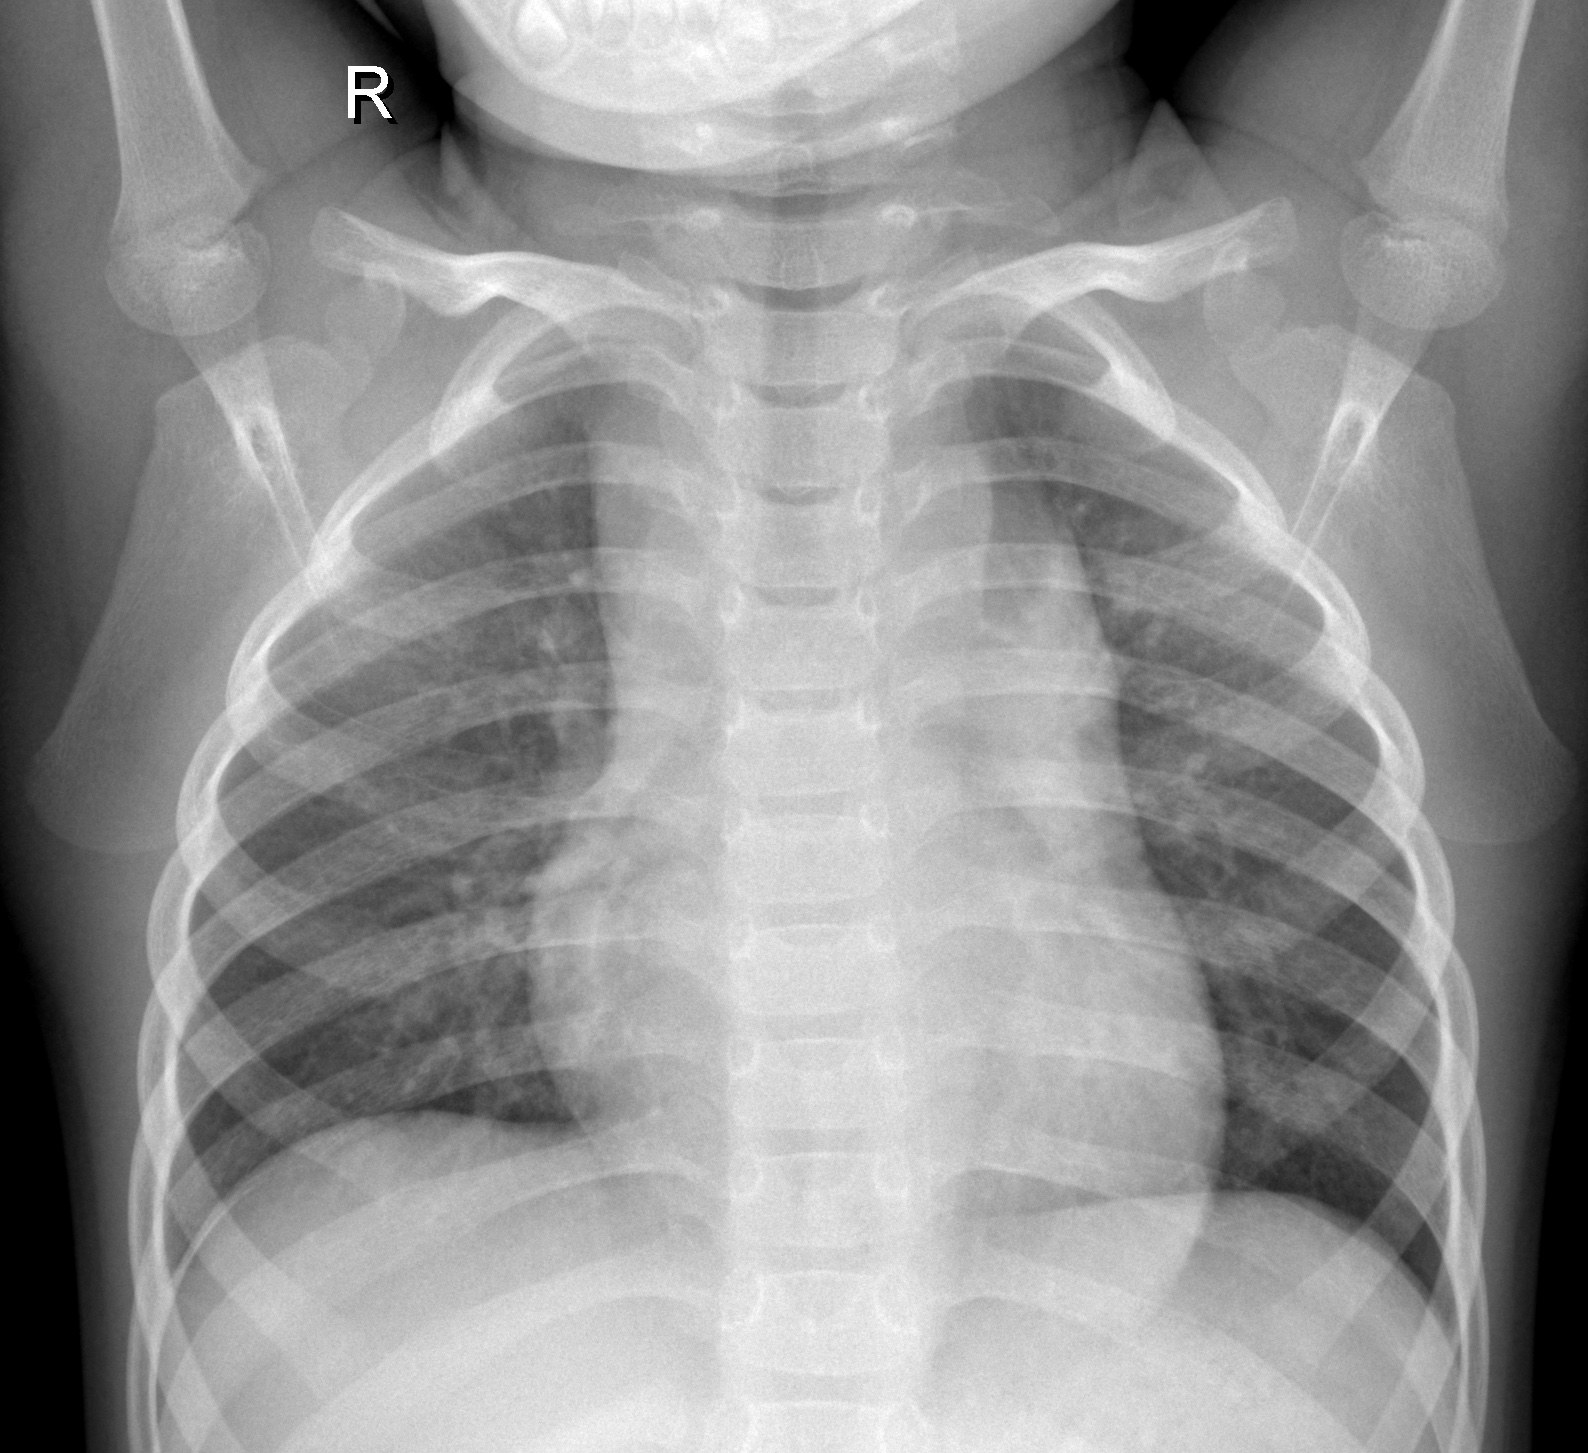

In [ ]:
PIL.Image.open(str(normal[18]))

In [ ]:
train_image_dict =  {
    'NORMAL' : list(data_train.glob('NORMAL/*')),
    'PNEUMONIA' : list(data_train.glob('PNEUMONIA/*')),
}

In [ ]:
train_lablel_dict = {
  'NORMAL' : 0,
  'PNEUMONIA' : 1,
}

In [ ]:
x , y =[] , []
for train_name, images in train_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (100,100))
        x.append(resized_img)
        y.append(train_lablel_dict[train_name])

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
num_classes = 2

In [ ]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


123/123 [==============================] - 44s 347ms/step - loss: 0.3611 - accuracy: 0.8407
Epoch 2/10
123/123 [==============================] - 38s 308ms/step - loss: 0.1154 - accuracy: 0.9573
Epoch 3/10
123/123 [==============================] - 40s 330ms/step - loss: 0.0939 - accuracy: 0.9665
Epoch 4/10
123/123 [==============================] - 38s 310ms/step - loss: 0.0840 - accuracy: 0.9709
Epoch 5/10
123/123 [==============================] - 40s 327ms/step - loss: 0.0755 - accuracy: 0.9734
Epoch 6/10
123/123 [==============================] - 47s 387ms/step - loss: 0.0514 - accuracy: 0.9816
Epoch 7/10
123/123 [==============================] - 39s 313ms/step - loss: 0.0596 - accuracy: 0.9757
Epoch 8/10
123/123 [==============================] - 41s 332ms/step - loss: 0.0500 - accuracy: 0.9816
Epoch 9/10
123/123 [==============================] - 38s 309ms/step - loss: 0.0363 - accuracy: 0.9870
Epoch 10/10
123/123 [==============================] - 41s 332ms/step - loss: 0.0263

In [ ]:
model.evaluate(x_test, y_test)

41/41 [==============================] - 5s 121ms/step - loss: 0.0844 - accuracy: 0.9724


[0.08437301218509674, 0.9723926186561584]

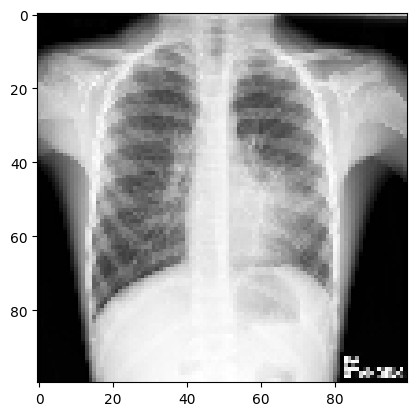

In [ ]:
img= cv2.imread("/content/4994014ef5c834e4803541aa1dc874_big_gallery.jpeg")
rez_img= cv2.resize(img, (100,100))
plt.imshow(rez_img)
plt.show()
rez_img= rez_img.reshape(1,100,100,3)

In [ ]:
model.predict(rez_img)

1/1 [==============================] - 0s 192ms/step


array([[0., 1.]], dtype=float32)